### **1. Importer les bibliothèques** 

In [ ]:
from fastai import *
from fastai.vision import *
from PIL import Image

#import standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import image
from matplotlib.image import imread
import matplotlib.image as mpimg
import cv2
import os
from glob import glob

from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


### **2. Load the data**

In [ ]:
Brain_CT_Path = Path("/content/drive/MyDrive/Data (1)") 

In [ ]:
JPG_Path = list(Brain_CT_Path.glob(r"**/*.jpg"))

In [ ]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))

In [ ]:
JPG_Path_Series = pd.Series(JPG_Path,name="JPG").astype(str)
JPG_Labels_Series = pd.Series(JPG_Labels,name="CATEGORY")
Main_Data = pd.concat([JPG_Path_Series,JPG_Labels_Series],axis=1)
print(Main_Data.head(-1))

                                                    JPG CATEGORY
0     /content/drive/MyDrive/Data (1)/NORMAL (1)/N2[...   N2[N2]
1     /content/drive/MyDrive/Data (1)/NORMAL (1)/N2[...   N2[N2]
2     /content/drive/MyDrive/Data (1)/NORMAL (1)/N2[...   N2[N2]
3     /content/drive/MyDrive/Data (1)/NORMAL (1)/N2[...   N2[N2]
4     /content/drive/MyDrive/Data (1)/NORMAL (1)/N2[...   N2[N2]
...                                                 ...      ...
6766  /content/drive/MyDrive/Data (1)/Hemorrhagic (1...   12[12]
6767  /content/drive/MyDrive/Data (1)/Hemorrhagic (1...   12[12]
6768  /content/drive/MyDrive/Data (1)/Hemorrhagic (1...   12[12]
6769  /content/drive/MyDrive/Data (1)/Hemorrhagic (1...   12[12]
6770  /content/drive/MyDrive/Data (1)/Hemorrhagic (1...   12[12]

[6771 rows x 2 columns]


In [ ]:
Main_Data["CATEGORY"].replace({"11[11]":"Hemorrhage","11[11]":"Hemorrhage","12[12]":"Hemorrhage","13[13]":"Hemorrhage",
                               "14[14]":"Hemorrhage","15[15]":"Hemorrhage","17[17]__":"Hemorrhage",
                               "19[19]":"Hemorrhage","1[1]":"Hemorrhage","20[20]_2":"Hemorrhage",
                               "21[21] _2":"Hemorrhage","2[2]":"Hemorrhage","3[3]":"Hemorrhage","4[4]":"Hemorrhage","5[5]":"Hemorrhage",
                               "6[6]":"Hemorrhage","7[7]":"Hemorrhage","8[8]":"Hemorrhage","9[9]":"Hemorrhage"},inplace=True)

Main_Data["CATEGORY"].replace({"N10[N10]":"Normal","N11[N11]":"Normal","N12[N12]":"Normal","N13[N13]":"Normal","N14[N14]":"Normal",
                               "N15[N15]":"Normal","N15[N15]":"Normal",
                               "N16[N16]":"Normal","N17[N17]":"Normal","N18[N18]":"Normal",
                               "N19[N19]":"Normal","N1[N1]":"Normal","N20[N20]":"Normal","N21[N21]":"Normal",
                               "N22[N22]":"Normal","N23[N23]":"Normal","N24[N24]":"Normal",
                               "N25[N25]":"Normal","N26[N26]":"Normal","N27[N27]":"Normal","N2[N2]":"Normal",
                               "N3[N3]":"Normal","N4[N4]":"Normal","N5[N5]":"Normal",
                               "N6[N6]":"Normal","N7[N7]":"Normal","N8[N8]":"Normal","N9[N9]":"Normal"},inplace=True)

In [ ]:
Main_Data.head()

,JPG,CATEGORY
0,/content/drive/MyDrive/Data (1)/NORMAL (1)/N2[...,Normal
1,/content/drive/MyDrive/Data (1)/NORMAL (1)/N2[...,Normal
2,/content/drive/MyDrive/Data (1)/NORMAL (1)/N2[...,Normal
3,/content/drive/MyDrive/Data (1)/NORMAL (1)/N2[...,Normal
4,/content/drive/MyDrive/Data (1)/NORMAL (1)/N2[...,Normal


### **3. Data exploration**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


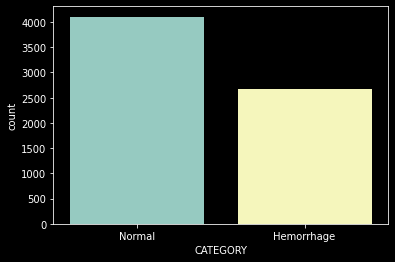

In [ ]:
plt.style.use('dark_background')

sns.countplot(Main_Data["CATEGORY"])
plt.show() 

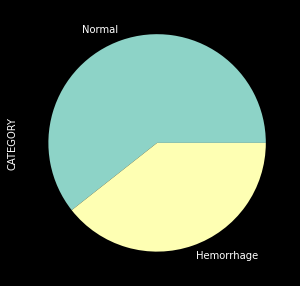

In [ ]:
Main_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

### **4. Data augmentation**

In [ ]:
Generator = ImageDataGenerator(rescale=1./255, #rescale multiplies each pixel value with the rescale factor. It helps with faster convergence
                               zoom_range=0.2, #zooms into the image
                              shear_range=0.2,
                              rotation_range=40, #rotation_range rotates the image randomly with maximum rotation angle, 40.
                              horizontal_flip=True, #randomly flips images, horizontally.
                               fill_mode="nearest",
                              validation_split=0.1) 


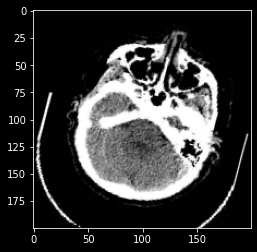

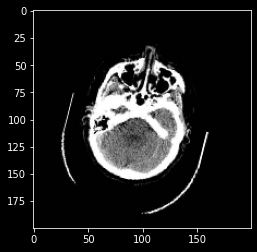

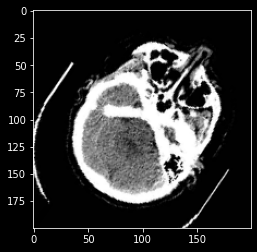

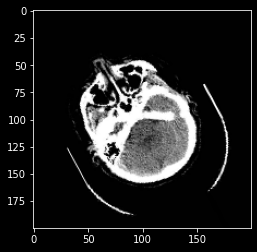

In [ ]:
example_Image = Main_Data["JPG"][0]
Load_Image = image.load_img(example_Image,target_size=(200,200))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0
for batch in Generator.flow(Array_Image,batch_size=1):
    plt.figure(i)
    IMG = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
path="/content/drive/MyDrive/Data (1)/NORMAL (1)/N2[N2]/N2_0_168.jpg"

img = cv2.imread(path,1)

## **4. 1. Plot Original image**

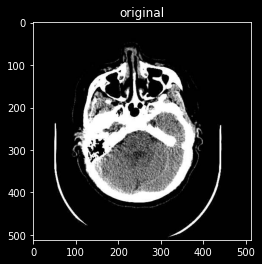

In [ ]:
fig=plt.figure(figsize=(4,4))
ax1 = fig.add_subplot()
ax1.title.set_text('original')
plt.imshow(img)
plt.show()

## **4. 2.Rotation**

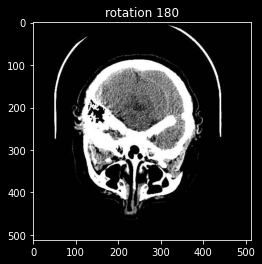

In [ ]:
image = cv2.flip(img,0)
fig=plt.figure(figsize=(4,4))
ax1 = fig.add_subplot() 
ax1.title.set_text('rotation 180')
plt.imshow(image)
plt.show()

## **4. 3.Plot Flipped Image**

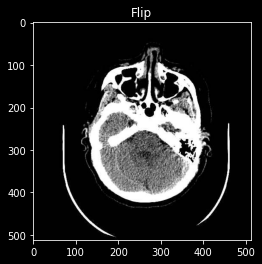

In [ ]:
image = cv2.flip(img,1)
fig=plt.figure(figsize=(4,4))
ax1 = fig.add_subplot() 
ax1.title.set_text('Flip')
plt.imshow(image)
plt.show() 

## **4. 4.Blur**

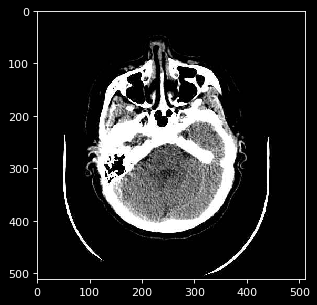

In [ ]:
img = imread(path)
plt.figure(num=None, figsize=(4,4), dpi=80)
imshow(img);

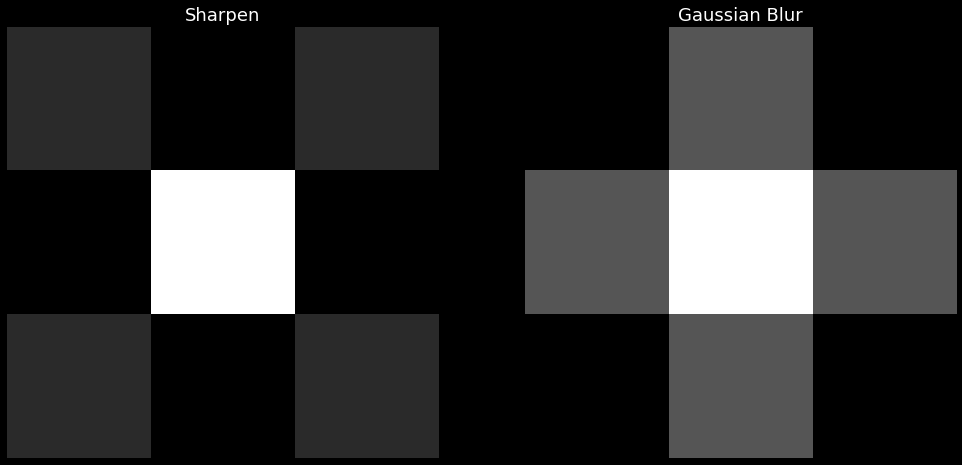

In [ ]:
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
fig, ax = plt.subplots(1,2, figsize = (17,10))
ax[0].imshow(sharpen, cmap='gray')
ax[0].set_title(f'Sharpen', fontsize = 18)
    
ax[1].imshow(gaussian, cmap='gray')
ax[1].set_title(f'Gaussian Blur', fontsize = 18)
    
[axi.set_axis_off() for axi in ax.ravel()];

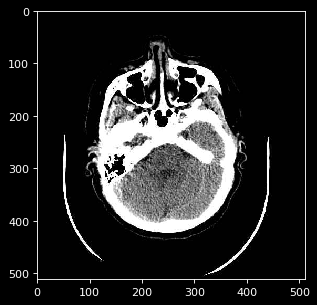

In [ ]:
dog_grey = rgb2gray(img)
plt.figure(num=None, figsize=(4,4), dpi=80)
imshow(dog_grey);

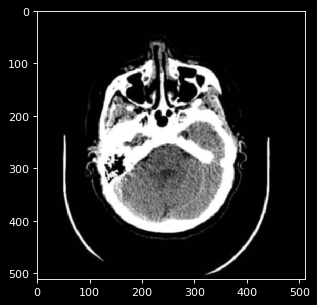

In [ ]:
convolved_image = multi_convolver(dog_grey, gaussian, 2)
plt.figure(num=None, figsize=(4,4), dpi=80)
imshow(convolved_image);

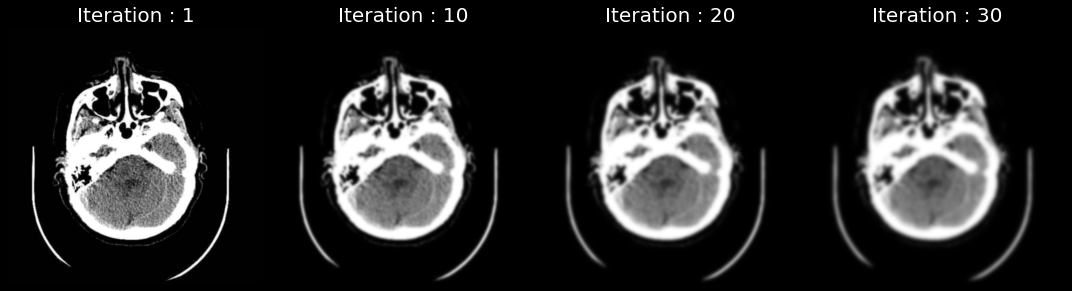

In [ ]:
def convolution_plotter(image, kernel):
    iterations = [1,10,20,30]
    f_size = 20
    
    fig, ax = plt.subplots(1,4, figsize = (15,7))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Iteration : {iterations[n]}', fontsize =
                     f_size)
        ax.imshow(multi_convolver(image, kernel, iterations[n]), 
                  cmap='gray')
        ax.set_axis_off()
    fig.tight_layout()
    
convolution_plotter(dog_grey, gaussian)


## **4. 5.la normalisation**

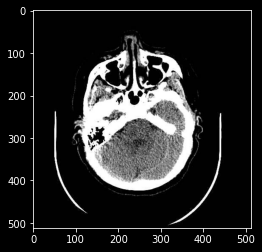

In [ ]:
img = cv.imread(path)
norm_img = np.zeros((800,800))
final_img = cv.normalize(img,  norm_img, 0, 255, cv.NORM_MINMAX)

plt.figure(figsize=(4,4))
plt.imshow(final_img)
plt.show()